In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#컬럼 한꺼번에보기
from IPython.display import display
pd.options.display.max_columns = None
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('dataset/final_final.csv',index_col =[0])
data.head()

,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result
0,1,M,60세이상,서울 강남구,506,41,101,10427810,440296,960114,648,7835397,3992823,263750,684741,3246090,3084870,2502759,871740,725300,448970,10,32,221,9,210,49,75,42,0.022,0.058,0.274,0.261,0.212,0.074,0.061,0.038,11828220,1,0,0,0,1,LOC_R,A100,1.0
1,2,M,60세이상,경기 김포시,711,0,0,14961860,0,0,711,9033800,5928060,152440,884510,2711870,354750,7559400,1782520,865770,650600,26,44,162,3,358,43,51,24,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043,14961860,1,0,0,0,1,LOC_S,A100,1.0
2,3,M,60세이상,서울 은평구,0,1,1027,0,1960,2799067,1028,1653999,1147028,687620,107945,273750,0,706792,212790,255880,556250,483,15,97,0,184,31,55,163,0.245,0.039,0.098,0.000,0.252,0.076,0.091,0.199,2801027,0,0,0,0,3,LOC_B,C20,1.0
3,4,F,60세이상,서울 노원구,498,91,127,4411080,629046,719454,716,2475696,3283884,31140,307526,1800600,173900,1942124,115900,1084660,303730,7,26,210,8,285,14,112,54,0.005,0.053,0.313,0.030,0.337,0.020,0.188,0.053,5759580,1,0,0,0,0,LOC_B,A40,0.0
4,5,M,60세이상,경기 김포시,633,1,0,8350290,16000,0,634,4722440,3643850,276290,168850,3660700,2277230,1230530,350740,63750,338200,28,9,320,17,206,25,3,26,0.033,0.020,0.438,0.272,0.147,0.042,0.008,0.040,8366290,0,0,0,0,3,LOC_S,A80,1.0


In [3]:
# 구매금액별 고객군 분류

print('총구매금액 20% 이하 고객의 구매금액 상위값:',np.percentile(data['TOTAL_AMT'],20))
print('총구매금액 20_40% 이하 고객의 구매금액:',np.percentile(data['TOTAL_AMT'],40))
print('총구매금액 40_60% 이하 고객의 구매금액:',np.percentile(data['TOTAL_AMT'],60))
print('총구매금액 60_80% 이하 고객의 구매금액:',np.percentile(data['TOTAL_AMT'],80))

총구매금액 20% 이하 고객의 구매금액 상위값: 4551136.8
총구매금액 20_40% 이하 고객의 구매금액: 6308210.600000001
총구매금액 40_60% 이하 고객의 구매금액: 8125781.800000001
총구매금액 60_80% 이하 고객의 구매금액: 10848424.2


In [4]:
# 구매금액별 고객군 분류

data['TOTAL_AMT_CAT'] = data['TOTAL_AMT']

def TOTAL_AMT_CAT(TOTAL_AMT):
    if TOTAL_AMT <= 4551136.8:
        return '20퍼구매금액군'
    if TOTAL_AMT <= 6308210.600000001:
        return '20_40퍼구매금액군'
    if TOTAL_AMT <= 8125781.800000001:
        return '40_60퍼구매금액군'
    if TOTAL_AMT <= 10848424.2:
        return '60_80퍼구매금액군'
    if TOTAL_AMT > 10848424.2:
        return '80_100퍼구매금액군'

data['TOTAL_AMT_CAT'] = data.TOTAL_AMT_CAT.apply(TOTAL_AMT_CAT)
data['TOTAL_AMT_CAT']

0        80_100퍼구매금액군
1        80_100퍼구매금액군
2            20퍼구매금액군
3         20_40퍼구매금액군
4         60_80퍼구매금액군
             ...     
19372        20퍼구매금액군
19373        20퍼구매금액군
19374     20_40퍼구매금액군
19375        20퍼구매금액군
19376        20퍼구매금액군
Name: TOTAL_AMT_CAT, Length: 19377, dtype: object

In [5]:
data['SHOP_T_A'] = (data['SHOP_A_CNT']>data['SHOP_B_CNT']) & (data['SHOP_A_CNT']>data['SHOP_C_CNT'])
data['SHOP_T_B'] = (data['SHOP_B_CNT']>data['SHOP_A_CNT']) & (data['SHOP_B_CNT']>data['SHOP_C_CNT'])
data['SHOP_T_C'] = (data['SHOP_C_CNT']>data['SHOP_A_CNT']) & (data['SHOP_C_CNT']>data['SHOP_B_CNT'])

data['SHOP_T_A'].replace(True,1,inplace=True)
data['SHOP_T_A'].replace(False,0,inplace=True)
data['SHOP_T_B'].replace(True,1,inplace=True)
data['SHOP_T_B'].replace(False,0,inplace=True)
data['SHOP_T_C'].replace(True,1,inplace=True)
data['SHOP_T_C'].replace(False,0,inplace=True)

In [6]:
# 고객이 가장 많이 이용한 제휴사로 고객속성을 분류하고 속성별 구매금액의 등급으로 변수 설정

def TA_S(TOTAL_AMT_CAT, SHOP_T_A, SHOP_T_B, SHOP_T_C):
    if (TOTAL_AMT_CAT=='20퍼구매금액군' and SHOP_T_A==1):
        return 'A20'
    elif (TOTAL_AMT_CAT=='20_40퍼구매금액군' and SHOP_T_A==1):
        return 'A40'
    elif TOTAL_AMT_CAT=='40_60퍼구매금액군' and SHOP_T_A==1:
        return 'A60'
    elif TOTAL_AMT_CAT=='60_80퍼구매금액군' and SHOP_T_A==1:
        return 'A80'
    elif TOTAL_AMT_CAT=='80_100퍼구매금액군' and SHOP_T_A==1:
        return 'A100'
    elif TOTAL_AMT_CAT=='20퍼구매금액군' and SHOP_T_B==1:
        return 'B20'
    elif TOTAL_AMT_CAT=='20_40퍼구매금액군' and SHOP_T_B==1:
        return 'B40'
    elif TOTAL_AMT_CAT=='40_60퍼구매금액군' and SHOP_T_B==1:
        return 'B60'
    elif TOTAL_AMT_CAT=='60_80퍼구매금액군' and SHOP_T_B==1:
        return 'B80'
    elif TOTAL_AMT_CAT=='80_100퍼구매금액군' and SHOP_T_B==1:
        return 'B100'
    elif TOTAL_AMT_CAT=='20퍼구매금액군' and SHOP_T_C==1:
        return 'C20'
    elif TOTAL_AMT_CAT=='20_40퍼구매금액군' and SHOP_T_C==1:
        return 'C40'
    elif TOTAL_AMT_CAT=='40_60퍼구매금액군' and SHOP_T_C==1:
        return 'C60'
    elif TOTAL_AMT_CAT=='60_80퍼구매금액군' and SHOP_T_C==1:
        return 'C80'
    elif TOTAL_AMT_CAT=='80_100퍼구매금액군' and SHOP_T_C==1:
        return 'C100'
    
data['TA_S'] = data.apply(lambda x: TA_S(x['TOTAL_AMT_CAT'], x['SHOP_T_A'], x['SHOP_T_B'], x['SHOP_T_C']),axis=1) 

In [7]:
data[data.TA_S.isnull()].head()

,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result,TOTAL_AMT_CAT,SHOP_T_A,SHOP_T_B,SHOP_T_C
195,196,F,60세이상,서울 노원구,262,384,384,3163190,2546762,1934809,1030,3719725,3925036,278750,882925,1392390,77060,2419115,1122920,949971,521630,26,73,188,4,456,79,114,90,0.036,0.115,0.182,0.01,0.316,0.147,0.124,0.068,7644761,0,0,0,0,1,LOC_B,None,0.0,40_60퍼구매금액군,0.0,0.0,0.0
1759,1761,F,55세~59세,서울 광진구,4,4,0,41420,11282,0,8,17282,35420,0,14620,20000,0,13782,4300,0,0,0,1,2,0,4,1,0,0,0.000,0.277,0.379,0.00,0.262,0.082,0.000,0.000,52702,1,0,0,0,9,LOC_N,None,0.0,20퍼구매금액군,0.0,0.0,0.0
3015,3017,F,50세~54세,서울 송파구,29,29,1,296820,187290,2050,59,164890,321270,18190,0,308120,0,38800,72200,27580,21270,5,0,33,0,7,5,5,4,0.037,0.000,0.634,0.00,0.080,0.149,0.057,0.044,486160,0,0,0,0,31,LOC_A,None,0.0,20퍼구매금액군,0.0,0.0,0.0
3043,3045,F,50세~54세,전북,132,132,16,1572330,690747,87230,280,1300067,1050240,42900,0,1301920,0,318887,368300,120640,197660,10,0,140,0,48,15,23,44,0.018,0.000,0.554,0.00,0.136,0.157,0.051,0.084,2350307,0,0,0,0,2,LOC_N,None,1.0,20퍼구매금액군,0.0,0.0,0.0
5996,5999,F,40세~44세,경기 김포시,219,7,219,3293620,78230,911300,445,1869230,2413920,34390,250300,2171610,0,1361550,162840,156170,146290,4,16,256,0,97,11,23,38,0.008,0.058,0.507,0.00,0.318,0.038,0.036,0.034,4283150,0,0,0,0,4,LOC_S,None,0.0,20퍼구매금액군,0.0,0.0,0.0


In [8]:
data.drop('CUST_NO',axis = 1, inplace =True)

In [9]:
index_outlier = data.TOTAL_AMT.sort_values(ascending=False)[:10].index
index_outlier

Int64Index([7954, 6204, 3831, 2346, 4657, 7798, 9269, 16000, 11674, 15389], dtype='int64')

In [10]:
# 5억 기준으로 이상치 제거

data.drop(index_outlier,axis=0,inplace=True)
data.TOTAL_AMT.sort_values(ascending=False)

5717     493114662
9403     422809456
9773     405025426
2448     338769631
3888     318604760
           ...    
11649         3420
11854         3200
18597         3000
18971         2880
141           1800
Name: TOTAL_AMT, Length: 19367, dtype: int64

In [11]:
data.isnull().sum()

GENDER            0
AGE               0
AREA              0
SHOP_A_CNT        0
SHOP_B_CNT        0
SHOP_C_CNT        0
SHOP_A_AMT        0
SHOP_B_AMT        0
SHOP_C_AMT        0
TOTAL_CNT         0
Y14_AMT           0
Y15_AMT           0
주류_AMT            0
육류_AMT            0
간식류_AMT           0
건강식품_AMT          0
농산물_AMT           0
수산물_AMT           0
식사류반찬_AMT         0
음료_AMT            0
주류_CNT            0
육류_CNT            0
간식류_CNT           0
건강식품_CNT          0
농산물_CNT           0
수산물_CNT           0
식사류반찬_CNT         0
음료_CNT            0
Alcohol_p_t1      0
Meat_p_t1         0
Snack_p_t1        0
Health_p_t1       0
FarmF_p_t1        0
SeaF_p_t1         0
SideF_p_t1        0
Drink_p_t1        0
TOTAL_AMT         0
COMPETITOR_YN     0
MEMBERSHIP_YN     0
ON_LINE_YN        0
MOBILE_YN         0
RECENCY           0
ADDR_cleaned      0
TA_S             22
Result            0
TOTAL_AMT_CAT     0
SHOP_T_A          0
SHOP_T_B          0
SHOP_T_C          0
dtype: int64

In [12]:
data.drop(data[data.TA_S.isnull()].index, inplace=True)

In [13]:
data = data[data.Result == 1]

In [14]:
data.drop(['TOTAL_AMT_CAT','SHOP_T_A','SHOP_T_B','SHOP_T_C'], axis=1, inplace=True)

In [15]:
data.shape

(8844, 45)

In [16]:
data.head(2)

,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result
0,M,60세이상,서울 강남구,506,41,101,10427810,440296,960114,648,7835397,3992823,263750,684741,3246090,3084870,2502759,871740,725300,448970,10,32,221,9,210,49,75,42,0.022,0.058,0.274,0.261,0.212,0.074,0.061,0.038,11828220,1,0,0,0,1,LOC_R,A100,1.0
1,M,60세이상,경기 김포시,711,0,0,14961860,0,0,711,9033800,5928060,152440,884510,2711870,354750,7559400,1782520,865770,650600,26,44,162,3,358,43,51,24,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043,14961860,1,0,0,0,1,LOC_S,A100,1.0


In [19]:
!pip install kmodes

In [20]:
from kmodes.kprototypes import KPrototypes

In [21]:
from sklearn.preprocessing import PowerTransformer

#numerical = cust_df.select_dtypes(exclude='object')
for c in data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    data[c] =  pt.fit_transform(np.array(data[c]).reshape(-1,1))

categorical_columns = [0,1,2,42,43] #make sure to specify correct indices

#Actual clustering
kproto = KPrototypes(n_clusters= 3, init='Cao', n_jobs = 4)
#kproto = KPrototypes(n_clusters=10, verbose =2, max_iter =20)
clusters = kproto.fit_predict(data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()

1    3434
0    3351
2    2059
dtype: int64

In [22]:
# #Choosing optimal K
# cost = []
# for num_clusters in list(range(1,8)):
#     kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
#     kproto.fit_predict(data, categorical=categorical_columns)
#     cost.append(kproto.cost_)

# plt.plot(cost)

In [23]:
# print(kproto.cluster_centroids_)

In [24]:
cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

In [25]:
data['cluster'] = cluster_dict

In [26]:
data['cluster'].value_counts()

1    3434
0    3351
2    2059
Name: cluster, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8844 entries, 0 to 19347
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GENDER         8844 non-null   object 
 1   AGE            8844 non-null   object 
 2   AREA           8844 non-null   object 
 3   SHOP_A_CNT     8844 non-null   float64
 4   SHOP_B_CNT     8844 non-null   float64
 5   SHOP_C_CNT     8844 non-null   float64
 6   SHOP_A_AMT     8844 non-null   float64
 7   SHOP_B_AMT     8844 non-null   float64
 8   SHOP_C_AMT     8844 non-null   float64
 9   TOTAL_CNT      8844 non-null   float64
 10  Y14_AMT        8844 non-null   float64
 11  Y15_AMT        8844 non-null   float64
 12  주류_AMT         8844 non-null   float64
 13  육류_AMT         8844 non-null   float64
 14  간식류_AMT        8844 non-null   float64
 15  건강식품_AMT       8844 non-null   float64
 16  농산물_AMT        8844 non-null   float64
 17  수산물_AMT        8844 non-null   float64
 18  식사류반찬_A

플롯

In [28]:
import lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from sklearn.model_selection import cross_val_score

In [29]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

lgbm_data = data.drop('cluster',axis=1)
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')

clf_kp = LGBMClassifier(colsample_by_tree=0.8, random_state=0)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.969233720256441


In [32]:
!pip install shap

[LightGBM] [Warning] Unknown parameter: colsample_by_tree


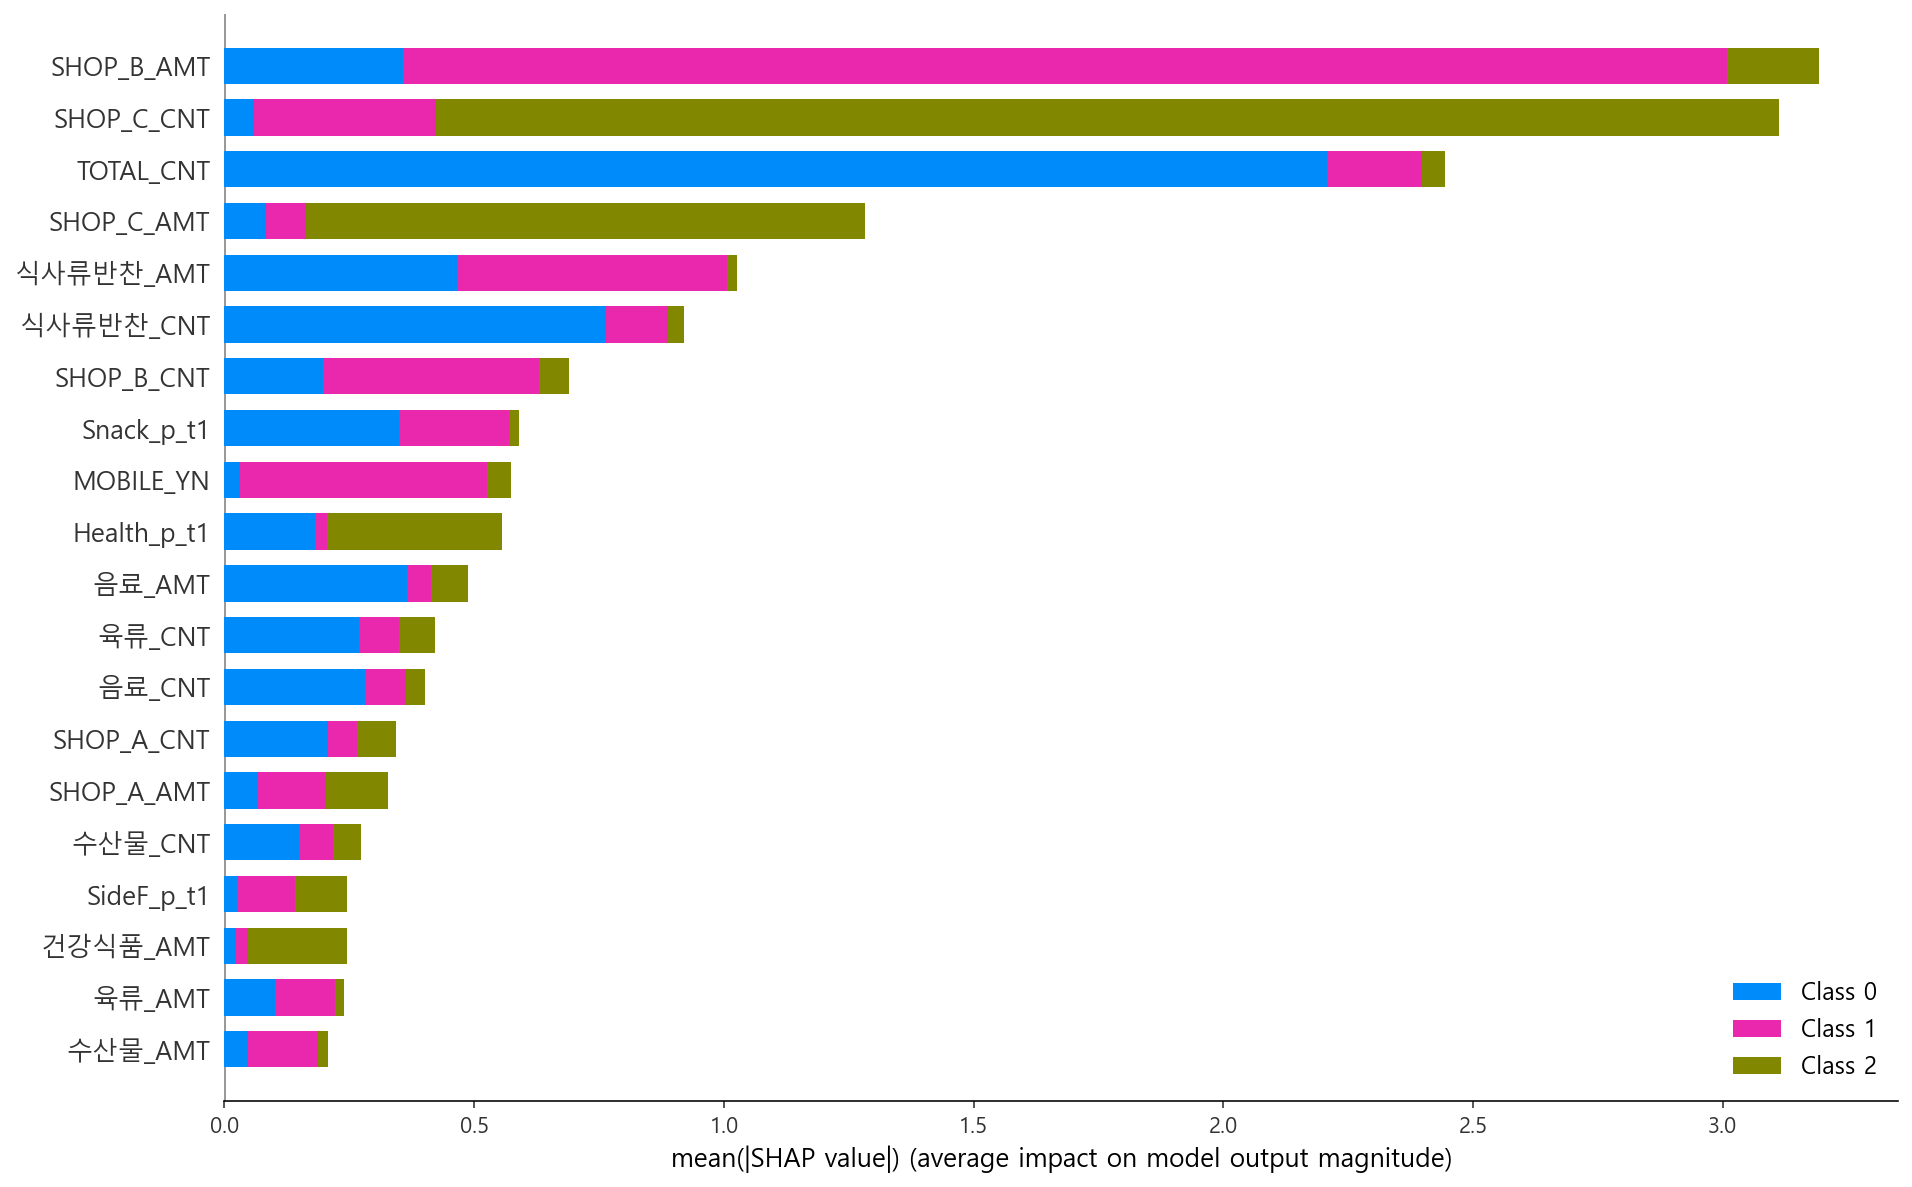

In [33]:
import shap
import matplotlib.pyplot as plt

clf_kp.fit(lgbm_data, clusters)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)
shap.summary_plot(shap_values_kp, lgbm_data, plot_type="bar", plot_size=(15, 10))

In [34]:
data[data['cluster']==0]['AREA'].value_counts().head()

경기 김포시    1020
부산         406
서울 송파구     231
경남         195
서울 강남구     175
Name: AREA, dtype: int64

In [35]:
data[data['cluster']==1]['AREA'].value_counts().head()

경기 김포시    1012
서울 송파구     330
인천         304
부산         274
서울 노원구     161
Name: AREA, dtype: int64

In [36]:
data[data['cluster']==2]['AREA'].value_counts().head()

경기 김포시    663
광주        139
부산        131
경북        111
서울 강남구     95
Name: AREA, dtype: int64

In [37]:
result = pd.read_csv('dataset/final_final.csv')
result.head(2)

,Unnamed: 0,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result
0,0,1,M,60세이상,서울 강남구,506,41,101,10427810,440296,960114,648,7835397,3992823,263750,684741,3246090,3084870,2502759,871740,725300,448970,10,32,221,9,210,49,75,42,0.022,0.058,0.274,0.261,0.212,0.074,0.061,0.038,11828220,1,0,0,0,1,LOC_R,A100,1.0
1,1,2,M,60세이상,경기 김포시,711,0,0,14961860,0,0,711,9033800,5928060,152440,884510,2711870,354750,7559400,1782520,865770,650600,26,44,162,3,358,43,51,24,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043,14961860,1,0,0,0,1,LOC_S,A100,1.0


In [38]:
result['cluster'] = data.cluster
result['gap'] = result.Y15_AMT - result.Y14_AMT

In [39]:
print(result[result['cluster']==0].gap.mean())
print(result[result['cluster']==1].gap.mean())
print(result[result['cluster']==2].gap.mean())

-1151210.336914354
-1199184.5215492137
-1218912.8426420593


In [40]:
# result.to_csv('dataset/cluster3.csv', mode='w')

In [41]:
result['Segment'] = result['cluster'].map({0:'First', 1:'Second', 2:'Third'})

In [42]:
result.head(2)

,Unnamed: 0,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result,cluster,gap,Segment
0,0,1,M,60세이상,서울 강남구,506,41,101,10427810,440296,960114,648,7835397,3992823,263750,684741,3246090,3084870,2502759,871740,725300,448970,10,32,221,9,210,49,75,42,0.022,0.058,0.274,0.261,0.212,0.074,0.061,0.038,11828220,1,0,0,0,1,LOC_R,A100,1.0,0.0,-3842574,First
1,1,2,M,60세이상,경기 김포시,711,0,0,14961860,0,0,711,9033800,5928060,152440,884510,2711870,354750,7559400,1782520,865770,650600,26,44,162,3,358,43,51,24,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043,14961860,1,0,0,0,1,LOC_S,A100,1.0,0.0,-3105740,First


In [43]:
# Cluster interpretation
result.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('Segment').agg(
    {
        'Total':'count',
        'GENDER': lambda x: x.value_counts()[0] / x.value_counts()[1],
        'AGE': lambda x: x.value_counts().index[0],
        'AREA': lambda x: x.value_counts().index[1],
        'SHOP_A_CNT': 'mean',
        'SHOP_B_CNT': 'mean',
        'SHOP_C_CNT': 'mean',
        'Y14_AMT': 'mean',
        'Y15_AMT': 'mean',
        'Alcohol_p_t1': 'mean',
        'Meat_p_t1': 'mean',
        'Snack_p_t1': 'mean',
        'Health_p_t1': 'mean',
        'FarmF_p_t1': 'mean',
        'SeaF_p_t1': 'mean',
        'SideF_p_t1': 'mean',
        'Drink_p_t1': 'mean',
        'TOTAL_AMT': 'mean',
        'COMPETITOR_YN': 'mean',
        'MEMBERSHIP_YN': 'mean',
        'ON_LINE_YN': 'mean',
        'MOBILE_YN': 'mean',
        'RECENCY' : 'mean',
        'ADDR_cleaned': lambda x: x.value_counts().index[0],
        'TA_S': lambda x: x.value_counts().index[0],
        'gap' : 'mean'
    }
).reset_index()

,Segment,Total,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,Y14_AMT,Y15_AMT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,gap
0,First,3351,4.670051,45세~49세,부산,324.963295,89.881826,53.351537,3.759453e+06,2.608242e+06,0.047369,0.100738,0.383613,0.088344,0.204919,0.065190,0.046678,0.063152,6.367695e+06,0.391525,0.271262,0.045956,0.200836,8.991346,LOC_S,A20,-1.151210e+06
1,Second,3434,4.704319,45세~49세,서울 송파구,113.166278,1155.041642,67.114444,5.481337e+06,4.282153e+06,0.042384,0.153091,0.193240,0.029348,0.240116,0.082447,0.142086,0.117299,9.763490e+06,0.241118,0.420210,0.146476,0.518346,2.366919,LOC_S,B80,-1.199185e+06
2,Third,2059,4.375979,45세~49세,광주,56.293346,73.793103,1787.661486,5.715361e+06,4.496448e+06,0.069777,0.170605,0.212157,0.007473,0.259632,0.074926,0.071842,0.133549,1.021181e+07,0.206897,0.235066,0.124818,0.074308,1.662458,LOC_S,C100,-1.218913e+06


In [44]:
result.head(2)

,Unnamed: 0,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result,Total,gap,Segment
0,0,1,M,60세이상,서울 강남구,506,41,101,10427810,440296,960114,648,7835397,3992823,263750,684741,3246090,3084870,2502759,871740,725300,448970,10,32,221,9,210,49,75,42,0.022,0.058,0.274,0.261,0.212,0.074,0.061,0.038,11828220,1,0,0,0,1,LOC_R,A100,1.0,0.0,-3842574,First
1,1,2,M,60세이상,경기 김포시,711,0,0,14961860,0,0,711,9033800,5928060,152440,884510,2711870,354750,7559400,1782520,865770,650600,26,44,162,3,358,43,51,24,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043,14961860,1,0,0,0,1,LOC_S,A100,1.0,0.0,-3105740,First


In [45]:
result[result.Segment=='First'].TA_S.value_counts()

A20     872
A40     656
A60     475
A80     332
A100    332
B20     279
C20     127
B40      76
B60      59
C40      47
C60      31
B100     21
B80      21
C80      13
C100     10
Name: TA_S, dtype: int64

In [46]:
result[result.Segment=='Second'].TA_S.value_counts()

B80     709
B100    695
B60     679
B40     642
B20     373
A100    155
A80      84
C100     31
C80      20
A60      20
C60      11
C40       7
A40       4
C20       4
Name: TA_S, dtype: int64

In [47]:
result[result.Segment=='Third'].TA_S.value_counts()

C100    529
C80     519
C60     448
C40     331
C20     138
A100     38
A80      16
A60      10
B100      9
B80       8
B60       7
B40       5
A40       1
Name: TA_S, dtype: int64

In [49]:
result.groupby('Segment').agg(
    {
        'Total':'count',
        'GENDER': lambda x: x.value_counts()[0] / x.value_counts()[1],
        'AGE': lambda x: x.value_counts().index[0],
        'AREA': lambda x: x.value_counts().index[1], # 1위는 김포
        'SHOP_A_CNT': 'median',
        'SHOP_B_CNT': 'median',
        'SHOP_C_CNT': 'median',
        'Y14_AMT': 'median',
        'Y15_AMT': 'median',
        'Alcohol_p_t1': 'median',
        'Meat_p_t1': 'median',
        'Snack_p_t1': 'median',
        'Health_p_t1': 'median',
        'FarmF_p_t1': 'median',
        'SeaF_p_t1': 'median',
        'SideF_p_t1': 'median',
        'Drink_p_t1': 'median',
        'TOTAL_AMT': 'median',
        'COMPETITOR_YN': 'mean',
        'MEMBERSHIP_YN': 'mean',
        'ON_LINE_YN': 'mean',
        'MOBILE_YN': 'mean',
        'RECENCY' : 'mean',
        'ADDR_cleaned': lambda x: x.value_counts().index[0],
        'TA_S': lambda x: x.value_counts().index[0],
        'gap' : 'mean'
    }
).reset_index()

,Segment,Total,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,Y14_AMT,Y15_AMT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,gap
0,First,3351,4.670051,45세~49세,부산,312,31.0,8,3098610,2252780,0.020,0.074,0.365,0.035,0.183,0.0480,0.032,0.045,5403110.0,0.391525,0.271262,0.045956,0.200836,8.991346,LOC_S,A20,-1.151210e+06
1,Second,3434,4.704319,45세~49세,서울 송파구,8,1089.5,10,4386615,3643026,0.022,0.142,0.181,0.009,0.231,0.0735,0.136,0.103,8079823.5,0.241118,0.420210,0.146476,0.518346,2.366919,LOC_S,B80,-1.199185e+06
2,Third,2059,4.375979,45세~49세,광주,3,15.0,1745,4638855,3838939,0.029,0.160,0.206,0.001,0.248,0.0680,0.066,0.119,8460770.0,0.206897,0.235066,0.124818,0.074308,1.662458,LOC_S,C100,-1.218913e+06


In [50]:
result.shape

(19377, 50)

In [51]:
result_loss = result[(result.Result==1)&(result.Total.notnull())]
result_loss.shape

(8844, 50)

In [52]:
loss_김포 = result_loss[result_loss.AREA=='경기 김포시']
loss_김포.shape

(2695, 50)

In [53]:
loss_김포아님 = result_loss[result_loss.AREA!='경기 김포시']
loss_김포아님.shape

(6149, 50)

In [54]:
# Cluster interpretation
loss_김포아님.groupby('Segment').agg(
    {
        'Total':'count',
        'GENDER': lambda x: x.value_counts()[0] / x.value_counts()[1],
        'AGE': lambda x: x.value_counts().index[0],
        'AREA': lambda x: x.value_counts().index[0],
        'SHOP_A_CNT': 'mean',
        'SHOP_B_CNT': 'mean',
        'SHOP_C_CNT': 'mean',
        'Y14_AMT': 'mean',
        'Y15_AMT': 'mean',
        'Alcohol_p_t1': 'mean',
        'Meat_p_t1': 'mean',
        'Snack_p_t1': 'mean',
        'Health_p_t1': 'mean',
        'FarmF_p_t1': 'mean',
        'SeaF_p_t1': 'mean',
        'SideF_p_t1': 'mean',
        'Drink_p_t1': 'mean',
        'TOTAL_AMT': 'mean',
        'COMPETITOR_YN': 'mean',
        'MEMBERSHIP_YN': 'mean',
        'ON_LINE_YN': 'mean',
        'MOBILE_YN': 'mean',
        'RECENCY' : 'mean',
        'ADDR_cleaned': lambda x: x.value_counts().index[0],
        'TA_S': lambda x: x.value_counts().index[0],
        'gap' : 'mean'
    }
).reset_index()

,Segment,Total,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,Y14_AMT,Y15_AMT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,gap
0,First,2331,4.523697,45세~49세,부산,311.001716,95.915487,54.847705,3.753128e+06,2.580704e+06,0.047467,0.099061,0.381822,0.089813,0.202537,0.065652,0.048076,0.065575,6.333832e+06,0.404118,0.275847,0.049764,0.206349,9.310596,LOC_B,A20,-1.172425e+06
1,Second,2422,4.382222,45세~49세,서울 송파구,118.232040,1128.063171,73.120149,5.637808e+06,4.372393e+06,0.043748,0.151006,0.196315,0.029990,0.235775,0.082354,0.141818,0.119011,1.001020e+07,0.241123,0.422791,0.144922,0.505367,2.399257,LOC_A,B100,-1.265415e+06
2,Third,1396,4.389961,45세~49세,광주,61.557307,77.786533,1773.978510,5.678806e+06,4.506780e+06,0.066703,0.171672,0.211573,0.008422,0.259885,0.076669,0.071385,0.133658,1.018559e+07,0.217049,0.225645,0.126791,0.073782,1.560888,LOC_B,C100,-1.172027e+06


In [55]:
# Cluster interpretation
loss_김포.groupby('Segment').agg(
    {
        'Total':'count',
        'GENDER': lambda x: x.value_counts()[0] / x.value_counts()[1],
        'AGE': lambda x: x.value_counts().index[0],
        'AREA': lambda x: x.value_counts().index[0],
        'SHOP_A_CNT': 'mean',
        'SHOP_B_CNT': 'mean',
        'SHOP_C_CNT': 'mean',
        'Y14_AMT': 'mean',
        'Y15_AMT': 'mean',
        'Alcohol_p_t1': 'mean',
        'Meat_p_t1': 'mean',
        'Snack_p_t1': 'mean',
        'Health_p_t1': 'mean',
        'FarmF_p_t1': 'mean',
        'SeaF_p_t1': 'mean',
        'SideF_p_t1': 'mean',
        'Drink_p_t1': 'mean',
        'TOTAL_AMT': 'mean',
        'COMPETITOR_YN': 'mean',
        'MEMBERSHIP_YN': 'mean',
        'ON_LINE_YN': 'mean',
        'MOBILE_YN': 'mean',
        'RECENCY' : 'mean',
        'ADDR_cleaned': lambda x: x.value_counts().index[0],
        'TA_S': lambda x: x.value_counts().index[0],
        'gap' : 'mean'
    }
).reset_index()

,Segment,Total,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,Y14_AMT,Y15_AMT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,gap
0,First,1020,5.035503,40세~44세,경기 김포시,356.869608,76.093137,49.932353,3.773905e+06,2.671176e+06,0.047145,0.104571,0.387705,0.084986,0.210361,0.064135,0.043481,0.057616,6.445081e+06,0.362745,0.260784,0.037255,0.188235,8.261765,LOC_S,A20,-1.102729e+06
1,Second,1012,5.657895,45세~49세,경기 김포시,101.042490,1219.608696,52.741107,5.106858e+06,4.066182e+06,0.039119,0.158079,0.185879,0.027811,0.250503,0.082671,0.142726,0.113201,9.173041e+06,0.241107,0.414032,0.150198,0.549407,2.289526,LOC_S,B60,-1.040676e+06
2,Third,663,4.346774,45세~49세,경기 김포시,45.209653,65.384615,1816.472097,5.792329e+06,4.474693e+06,0.076250,0.168357,0.213386,0.005474,0.259100,0.071255,0.072804,0.133320,1.026702e+07,0.185520,0.254902,0.120664,0.075415,1.876320,LOC_S,C80,-1.317635e+06


In [56]:
result.head(2)

,Unnamed: 0,CUST_NO,GENDER,AGE,AREA,SHOP_A_CNT,SHOP_B_CNT,SHOP_C_CNT,SHOP_A_AMT,SHOP_B_AMT,SHOP_C_AMT,TOTAL_CNT,Y14_AMT,Y15_AMT,주류_AMT,육류_AMT,간식류_AMT,건강식품_AMT,농산물_AMT,수산물_AMT,식사류반찬_AMT,음료_AMT,주류_CNT,육류_CNT,간식류_CNT,건강식품_CNT,농산물_CNT,수산물_CNT,식사류반찬_CNT,음료_CNT,Alcohol_p_t1,Meat_p_t1,Snack_p_t1,Health_p_t1,FarmF_p_t1,SeaF_p_t1,SideF_p_t1,Drink_p_t1,TOTAL_AMT,COMPETITOR_YN,MEMBERSHIP_YN,ON_LINE_YN,MOBILE_YN,RECENCY,ADDR_cleaned,TA_S,Result,Total,gap,Segment
0,0,1,M,60세이상,서울 강남구,506,41,101,10427810,440296,960114,648,7835397,3992823,263750,684741,3246090,3084870,2502759,871740,725300,448970,10,32,221,9,210,49,75,42,0.022,0.058,0.274,0.261,0.212,0.074,0.061,0.038,11828220,1,0,0,0,1,LOC_R,A100,1.0,0.0,-3842574,First
1,1,2,M,60세이상,경기 김포시,711,0,0,14961860,0,0,711,9033800,5928060,152440,884510,2711870,354750,7559400,1782520,865770,650600,26,44,162,3,358,43,51,24,0.010,0.059,0.181,0.024,0.505,0.119,0.058,0.043,14961860,1,0,0,0,1,LOC_S,A100,1.0,0.0,-3105740,First


In [57]:
seg1_p = result[result.Segment=='First'][['Alcohol_p_t1','Meat_p_t1','Snack_p_t1','Health_p_t1',
                                 'FarmF_p_t1','SeaF_p_t1','SideF_p_t1','Drink_p_t1']].mean()
seg2_p = result[result.Segment=='Second'][['Alcohol_p_t1','Meat_p_t1','Snack_p_t1','Health_p_t1',
                                 'FarmF_p_t1','SeaF_p_t1','SideF_p_t1','Drink_p_t1']].mean()
seg3_p = result[result.Segment=='Third'][['Alcohol_p_t1','Meat_p_t1','Snack_p_t1','Health_p_t1',
                                 'FarmF_p_t1','SeaF_p_t1','SideF_p_t1','Drink_p_t1']].mean()

In [58]:
seg1_p.sort_values(ascending=False)

Snack_p_t1      0.383613
FarmF_p_t1      0.204919
Meat_p_t1       0.100738
Health_p_t1     0.088344
SeaF_p_t1       0.065190
Drink_p_t1      0.063152
Alcohol_p_t1    0.047369
SideF_p_t1      0.046678
dtype: float64

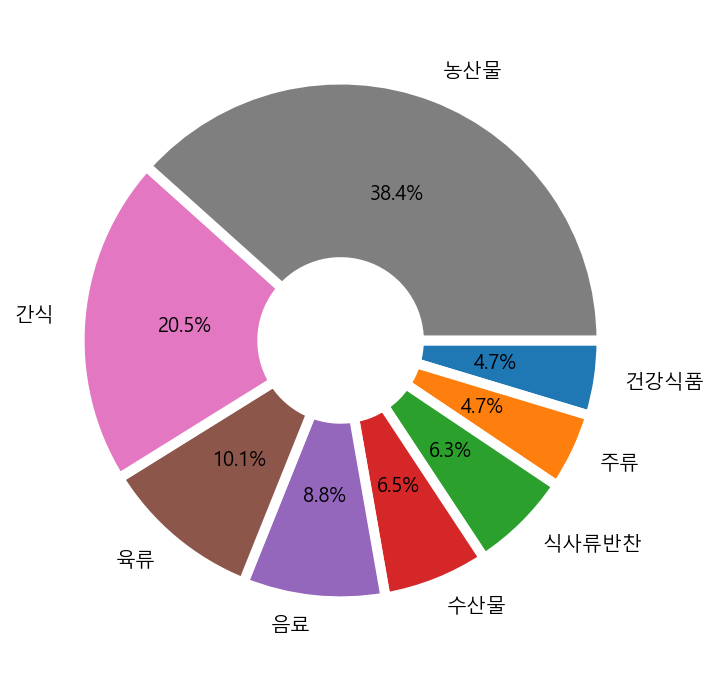

In [59]:
plt.figure(figsize=(6,6))
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}
labels = ['농산물', '간식', '육류','음료','수산물','식사류반찬','주류','건강식품'][::-1]
plt.pie(seg1_p.sort_values(), labels=labels,
        autopct='%0.1f%%', counterclock=False, wedgeprops=wedgeprops)
plt.show()

# segment 1의 구매 비중

In [60]:
seg2_p.sort_values(ascending=False)

FarmF_p_t1      0.240116
Snack_p_t1      0.193240
Meat_p_t1       0.153091
SideF_p_t1      0.142086
Drink_p_t1      0.117299
SeaF_p_t1       0.082447
Alcohol_p_t1    0.042384
Health_p_t1     0.029348
dtype: float64

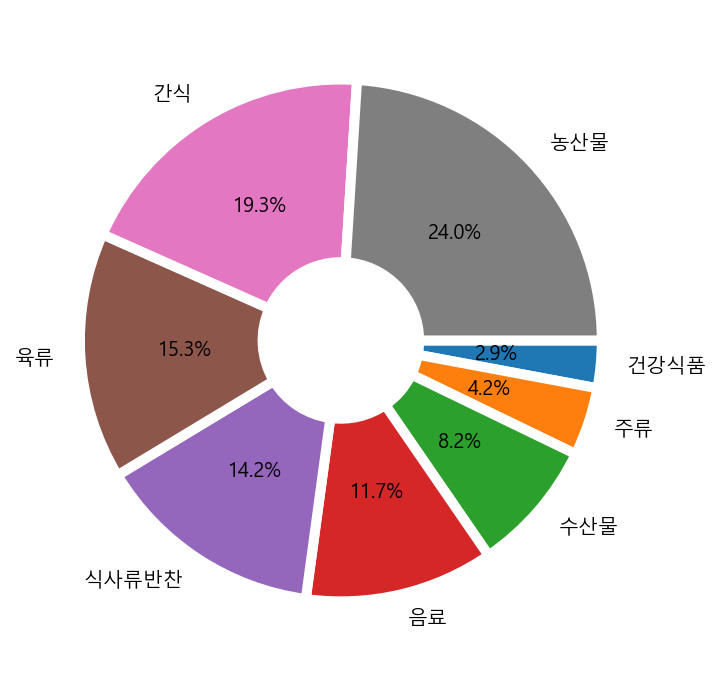

In [61]:
plt.figure(figsize=(6,6))
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}
labels = ['농산물', '간식', '육류','식사류반찬','음료','수산물','주류','건강식품'][::-1]
plt.pie(seg2_p.sort_values(), labels=labels,
        autopct='%0.1f%%', counterclock=False, wedgeprops=wedgeprops)
plt.show()

# segment 2의 구매 비중

In [62]:
seg3_p.sort_values(ascending=False)

FarmF_p_t1      0.259632
Snack_p_t1      0.212157
Meat_p_t1       0.170605
Drink_p_t1      0.133549
SeaF_p_t1       0.074926
SideF_p_t1      0.071842
Alcohol_p_t1    0.069777
Health_p_t1     0.007473
dtype: float64

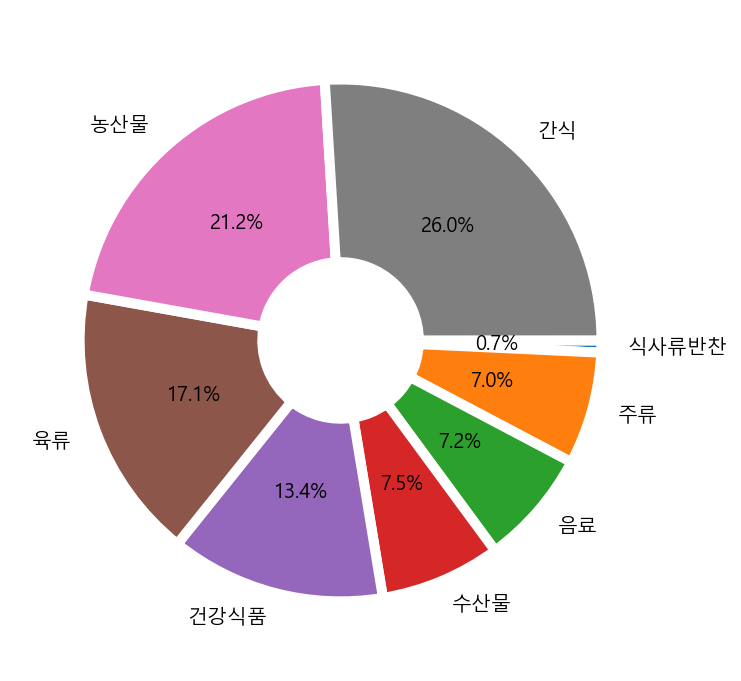

In [63]:
plt.figure(figsize=(6,6))
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}
labels = ['간식','농산물', '육류','건강식품','수산물','음료','주류','식사류반찬'][::-1]
plt.pie(seg3_p.sort_values(), labels=labels,
        autopct='%0.1f%%', counterclock=False, wedgeprops=wedgeprops)
plt.show()

# segment 3의 구매 비중